# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
df=pd.read_csv("C:/Users/User/Desktop/Deloitte Assignment/train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Setting Display options to ensure feature names

In [5]:
pd.set_option('display.max_columns',None)

# Warning Supression

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Dropping Loan_ID from the dataset

In [7]:
df=df.drop(['Loan_ID'],axis=1)

In [8]:
#Defining the Target varibale with 1 and 0 :(YES-1 AND NO-0)
df['target']=np.where(df['Loan_Status'].isin(['Y']),1,0)

In [9]:
df=df.drop(['Loan_Status'],axis=1)

# Defining the Target and Independetn Variables

In [10]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Response Rate

In [11]:
Y.mean()

target    0.687296
dtype: float64

In [12]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# Split features into Numerical and Categorical features

In [13]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [14]:
num.shape

(614, 5)

In [15]:
char.shape

(614, 6)

In [16]:
# Identifying number of unique values associated with each features for numerical data
def unique_levels(x):
    x=x.value_counts().count()
    return x
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [17]:
df_value_counts.columns=['features_level']
df_value_counts

,features_level
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


In [18]:
# Features which have less than 20 unique values
slice1=df_value_counts.loc[df_value_counts['features_level']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Loan_Amount_Term    float64
Credit_History      float64
dtype: object

In [19]:
# Features which have more than 20 unique values
slice2=df_value_counts.loc[df_value_counts['features_level']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
dtype: object

In [20]:
def data_converter(x):
    x=x.astype('object')
    return x
cat=cat.apply(lambda x: data_converter(x))

In [21]:
char=pd.concat([char,cat],axis=1,join='inner')

In [22]:
print("The shape of numerical dataframe ",num.shape)
print("The shape of categorical dataframe ",char.shape)

The shape of numerical dataframe  (614, 3)
The shape of categorical dataframe  (614, 8)


# Outlier Analysis of numerical features

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
1%,1025.000000,0.000000,30.000000
5%,1897.550000,0.000000,56.000000
10%,2216.100000,0.000000,71.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000


# Treatment of an outlier in dataset

In [24]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x    

In [25]:
num=num.apply(lambda x: outlier_cap(x))

In [26]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5214.577964,1483.654967,145.409054
std,4528.770082,1831.226927,79.927273
min,1025.000000,0.000000,30.000000
1%,1025.000000,0.000000,30.000000
5%,1897.550000,0.000000,56.000000
10%,2216.100000,0.000000,71.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000


# Missing value Handling

In [27]:
num.isnull().mean()

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
dtype: float64

# Missing value Handling -Using Imputation

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [29]:
num_1.isnull().mean()

ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

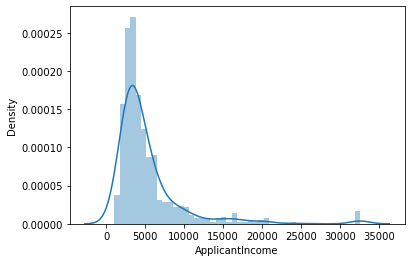

In [30]:
sns.distplot(num_1['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

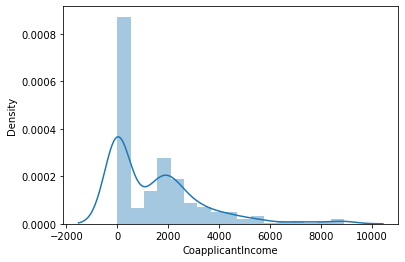

In [31]:
sns.distplot(num_1['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

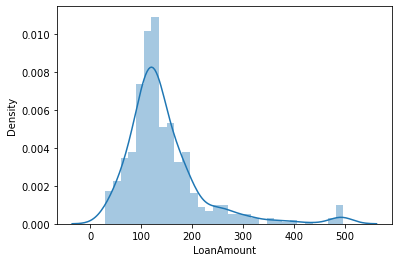

In [32]:
sns.distplot(num_1['LoanAmount'])

# Missing value handling -Categorical Features

In [33]:
char.isnull().mean()

Gender              0.021173
Married             0.004886
Dependents          0.024430
Education           0.000000
Self_Employed       0.052117
Property_Area       0.000000
Loan_Amount_Term    0.022801
Credit_History      0.081433
dtype: float64

In [34]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [35]:
char_1.isnull().mean()

Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
Property_Area       0.0
Loan_Amount_Term    0.0
Credit_History      0.0
dtype: float64

# Feature Selection-Numerical features

# Part-1 : Remove Features with zero variance 

In [36]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [37]:
num_2.iloc[0]

ApplicantIncome      5849.0
CoapplicantIncome       0.0
LoanAmount            128.0
Name: 0, dtype: float64

In [38]:
# Removing the CoapplicantIncome Features from the datset as it has zero variance
num_2=num_2.drop(['CoapplicantIncome'],axis=1)

# To check the Correlation between the independent features

<AxesSubplot:>

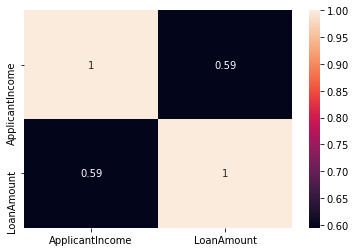

In [39]:
data=num_2.corr()
sns.heatmap(data,annot=True)

# Part-2 Bivariate Analysis 

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,ApplicantIncome_Rank,LoanAmount_Rank
0,7.0,5.0
1,6.0,5.0
2,2.0,0.0
3,1.0,4.0
4,7.0,6.0


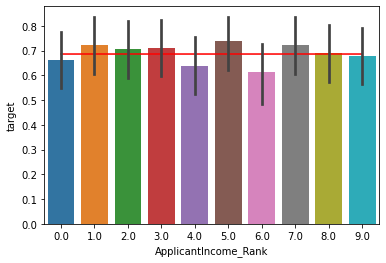

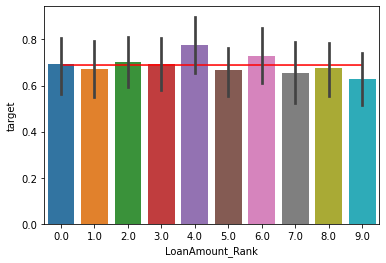

In [41]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [42]:
#Selecting all the features from the numerical categories
select_features_df_num = num_2

# Feature Selection- Categorical Features

In [43]:
char.dtypes

Gender              object
Married             object
Dependents          object
Education           object
Self_Employed       object
Property_Area       object
Loan_Amount_Term    object
Credit_History      object
dtype: object

# Bivariate Analysis-Categorical Features

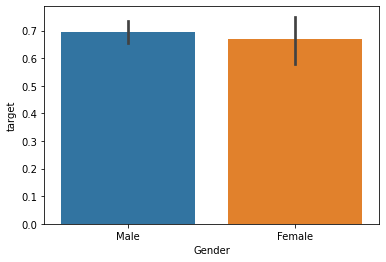

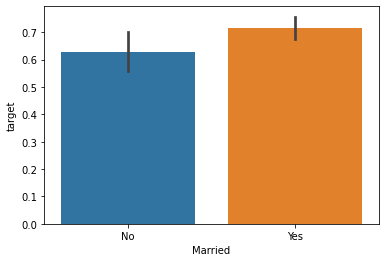

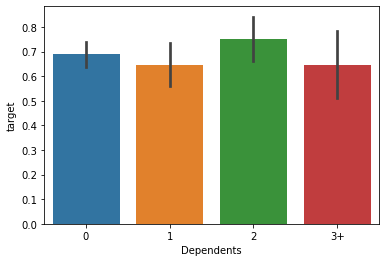

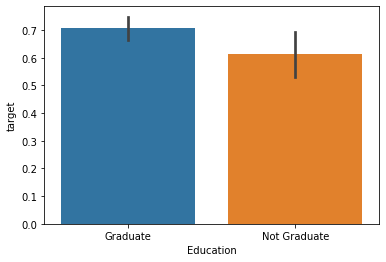

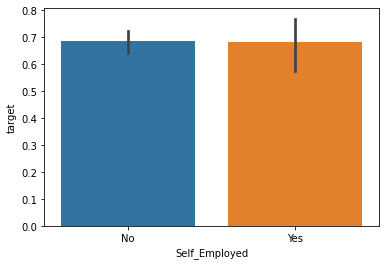

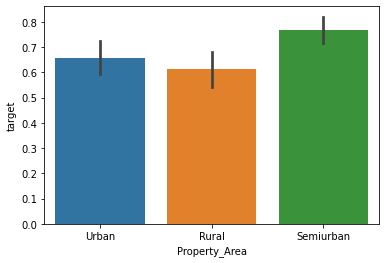

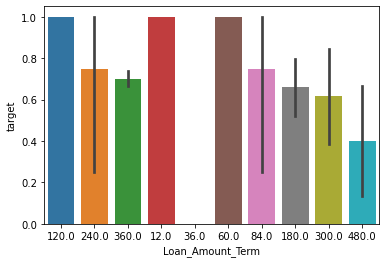

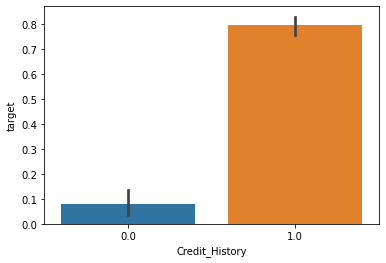

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    #sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col,y="target",data=X_char_merged,estimator=mean )
plt.show()

In [45]:
char=char.drop(['Gender'],axis=1)

In [46]:
char.dtypes

Married             object
Dependents          object
Education           object
Self_Employed       object
Property_Area       object
Loan_Amount_Term    object
Credit_History      object
dtype: object

In [47]:
#Create dumppy variables with n-1 levels
X_char_dum=pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(614, 18)

# Select K Best

In [48]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=15)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [49]:
select_features_df_char.dtypes

Married_Yes                uint8
Dependents_1               uint8
Dependents_2               uint8
Dependents_3+              uint8
Education_Not Graduate     uint8
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
Loan_Amount_Term_36.0      uint8
Loan_Amount_Term_60.0      uint8
Loan_Amount_Term_120.0     uint8
Loan_Amount_Term_180.0     uint8
Loan_Amount_Term_300.0     uint8
Loan_Amount_Term_360.0     uint8
Loan_Amount_Term_480.0     uint8
Credit_History_1.0         uint8
dtype: object

# Create the Dataframe for Model Development

In [50]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [51]:
X_all.shape

(614, 17)

# Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=28)

In [53]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (429, 17)
Shape of Testing Data (185, 17)
Response Rate in Training Data target    0.689977
dtype: float64
Response Rate in Testing Data target    0.681081
dtype: float64


# Building Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=28)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=28)

# Building a Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=28)

# Grid Search CV for model optimization

In [56]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75,100,125,150] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 75}


In [57]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=28,max_depth=3,min_samples_split=125)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=125, random_state=28)

# Building a Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=28,max_depth=3,min_samples_split=125)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=125, random_state=28)

# Building a Gradient Boosting Model

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=28,max_depth=3,min_samples_split=125)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', min_samples_split=125,
                           random_state=28)

# Building a XGBOOST Model

In [60]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=28,criterion='mse',max_depth=3,min_samples_split=125)
xgb.fit(X_train,y_train)

[19:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:55:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='mse',
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_split=125, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=28,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model Evaluation

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [62]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

In [63]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))

Accuracy from Logistic Regression Model : 0.772972972972973
Precision from Logistic Regression Model : 0.7916666666666666
Recall from Logistic Regression Model : 0.9047619047619048
f1_score from Logistic Regression Model : 0.8444444444444444
Area under ROC Curve from Logistic Regression Model : 0.6981436642453591


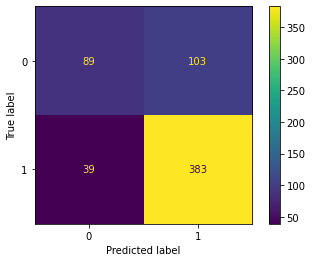

In [64]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [65]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))

Accuracy from Decision Tree Model : 0.7945945945945946
Precision from Decision Tree Model : 0.8188405797101449
Recall from Decision Tree Model : 0.8968253968253969
f1_score from Decision Tree Model : 0.856060606060606
Area under ROC Curve from Decision Tree Model : 0.7365482916330375


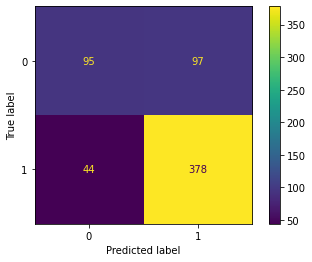

In [66]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [67]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))

Accuracy from Random Forest Model : 0.7405405405405405
Precision from Random Forest Model : 0.7532467532467533
Recall from Random Forest Model : 0.9206349206349206
f1_score from Random Forest Model : 0.8285714285714286
Area under ROC Curve from Random Forest Model : 0.6382835620123756


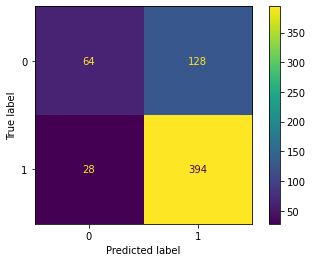

In [68]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [69]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))

Accuracy from GBM Model : 0.7513513513513513
Precision from GBM Model : 0.7898550724637681
Recall from GBM Model : 0.8650793650793651
f1_score from GBM Model : 0.8257575757575758
Area under ROC Curve from GBM Model : 0.6867769706752758


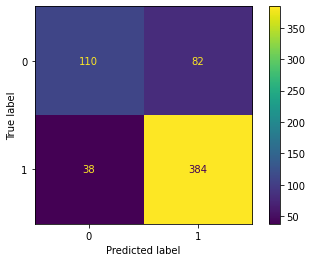

In [75]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [70]:
from sklearn import metrics
print("Accuracy from XGBOOST:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision from XGBOOST",metrics.precision_score(y_test,y_pred_xgb))
print("Recall froom XGBOOST",metrics.recall_score(y_test,y_pred_xgb))
print("f1_score from XGBOOST",metrics.f1_score(y_test,y_pred_xgb))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_xgb))

Accuracy from XGBOOST: 0.7189189189189189
Precision from XGBOOST 0.7681159420289855
Recall froom XGBOOST 0.8412698412698413
f1_score from XGBOOST 0.8030303030303031
Area under ROC Curve from GBM Model : 0.6494484799569545


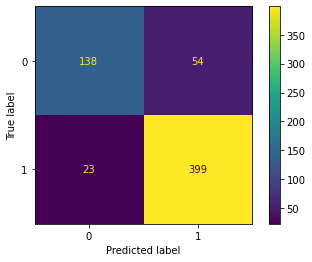

In [71]:
metrics.plot_confusion_matrix(xgb,X_all,Y)

# Extracting the Top Features from the best Model

In [72]:
import pandas as pd
feature_importances=pd.DataFrame(xgb.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(17, 1)

In [73]:
feature_importances.iloc[0:10]

,importance
Credit_History_1.0,0.341438
Dependents_3+,0.073092
Loan_Amount_Term_180.0,0.064303
Loan_Amount_Term_360.0,0.063498
Dependents_1,0.060563
Property_Area_Semiurban,0.058062
Loan_Amount_Term_480.0,0.056791
Married_Yes,0.052990
Education_Not Graduate,0.051548
Dependents_2,0.047780


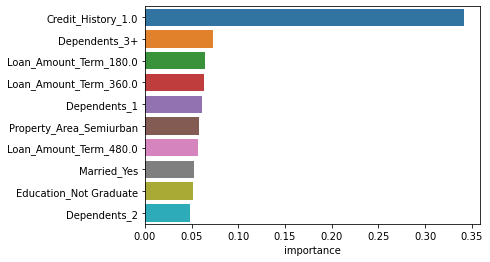

In [74]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Project Report and Actionable Insights

# Objective of the Project

Predict the customer eligibility for loan.Build the model which will tell us that whether we should give loan to customer or not.

# Baseline Event Rate

The Response Rate from the data is 68%.

# Algorithms Used :

In this project we have used Logistic Regression, Decision Trees, Random Forests,Gradient Boosting and XGboost Algorithm.

# Final Model Algorithm

We have kept XGBOOST  as the final model algorithm,as False Negative(FN) are less in XGBOOST as compared to other model.

So this will help the business in reducing or giving false loan to a customer who are not eligible for loan in real case scenario.

# Grid Search CV parameters

Maximum Depth of Tree - 3

Minimum Sample Size for Nodes to be Split - 125 Observations

# Model Performance Measures
Accuracy - 0.71

Precision - 0.76

Recall - 0.84

F1 Score - 0.80

AUC - 0.64


# Top 10 drivers from the Model

Credit_History_1.0	

Dependents_3+	

Loan_Amount_Term_180.0

Loan_Amount_Term_360.0	

Dependents_1	

Property_Area_Semiurban

Loan_Amount_Term_480.0

Married_Yes	0.052990

Education_Not Graduate	

Dependents_2

# Analysis:

Credit_History is one of the best features in the dataset which will help us to achive our goal before gving loan to a customer.

People who are Graduate has a higher chance for a loan eligibility as compared to Non Graduate.

People in Semiurban area has higher chance for a loan eligibility as compared to other.

# Note:

We can still do more hyperparametertuning using GridSearchCV to come up with better results and select different model based on the business requirements.